<a href="https://colab.research.google.com/github/Bhavani-Rajan/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [31]:

def mean(sales_list):
  l = len(sales_list)
  mu = sum(sales_list) / l
#   print(mu)
  return mu

def variance(sales_list):
  mu = mean(sales_list)
  err = []
  l = len(sales_list)
  for i in range(l):
    err_val = (sales_list[i] - mu) ** 2 
#     print(sales_list[i])
#     print((sales_list[i] - mu))
    err.append(err_val)
  var = sum(err) / l
#   print(err)
  return var

def stdev(sales_list):
  std = variance(sales_list) **(1/2)
  return std

sales = [3505,2400,3027,2798,3700,3250,2689]
mean_sales = mean(sales)
var = variance(sales)
std_sales = stdev(sales)
print('Mean ' + str(mean_sales))
print('Variance ' + str(var))
print('Std deviation ' + str(std_sales))

# df = pd.DataFrame(sales)

Mean 3052.714285714286
Variance 183761.06122448976
Std deviation 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [23]:
import pandas as pd
sales = [3505,2400,3027,2798,3700,3250,2689]
cust =[127,80,105,92,120,115,93]
data = {"sales": sales,"customers" : cust}
df = pd.DataFrame(data)
df.head()


,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [22]:
df['sales'].var(ddof=0)

183761.06122448976

In [24]:
df['customers'].var(ddof=0)

249.3877551020408

In [30]:
df_cov = df.cov()
print(df_cov)

                   sales    customers
sales      214387.904762  7604.357143
customers    7604.357143   290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [27]:
std_cust = stdev(cust)
print(std_cust)

15.792015549069118


In [0]:
df_corr = df_cov /(std_sales * std_cust)

In [38]:
print(std_sales)
print(std_cust)
print(df_cov)


print(df_corr)

428.67360686714756
15.792015549069118
                   sales    customers
sales      214387.904762  7604.357143
customers    7604.357143   290.952381
               sales  customers
sales      31.669118   1.123306
customers   1.123306   0.042979


In [41]:
print(df.sales.std())
print(df.customers.std())

df.corr()

463.0204150595357
17.057326313123664


,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
data_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df_tit = pd.read_csv(data_url)

In [46]:
df_tit.head()
df_tit.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [47]:
df_new = df_tit.drop(['name','sex','ticket','cabin','embarked','boat','home.dest'],axis=1)

df_new.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
body                float64
has_cabin_number      int64
dtype: object

In [48]:
df_new.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [49]:
df_new.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# 2. Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

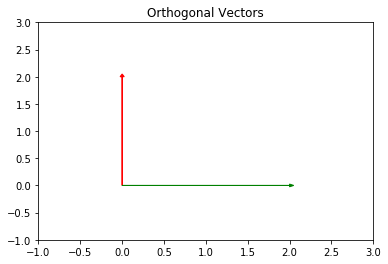

In [52]:
import matplotlib.pyplot as plt

vector_1 = [0, 2]
vector_2 = [2, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

# orthogonal or perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [58]:


a = [-5,3,7]
b = [6,-8,2]

dot_prod = (a[0]*b[0])+(a[1]*b[1])+(a[2]*b[2])
print(dot_prod)

-40


In [0]:
# No, they are not. dot product of the orthogonal vector is zero. 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [72]:
c=[2,-15,6,20]

norm = np.linalg.norm(c)
norm ** 2

665.0

In [62]:
prod = 0.0
for i in range(len(c)):
 prod = prod + c[i] * c[i] 

prod

665.0

In [79]:
c = np.array([[2,-15,6,20]])
c.shape

(1, 4)

In [81]:
np.transpose(c).shape

(4, 1)

In [82]:
np.matmul(c,np.transpose(c))

array([[665]])

its all the same result

# 3. Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

d = 7i + 12j

e = 2i + 11j - 8k

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [84]:
f= [4,12,11,9,2]
norm = np.linalg.norm(f)
unit_vec = f / norm
print(norm)
unit_vec

19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# 4. Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

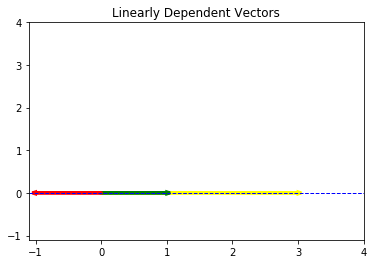

In [85]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

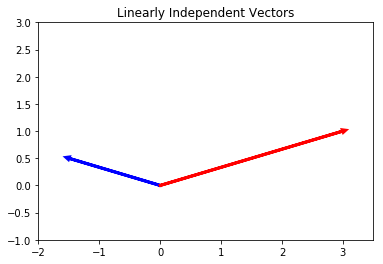

In [86]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# 5. Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# since these two vectors are linearly dependent, 
# their span is the line that they lie on.
# they span the line y = x/2
# They span the real numbers

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [87]:
np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

since rank is 3, none of the vectors are redundant. Or linearly independent.[link text](https://)

span is for vectors and rank is for matrix. *italicized text*

# 6. Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



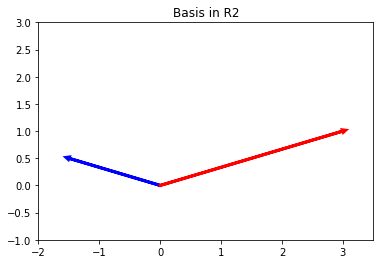

In [88]:
# Plot Linearly Independent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Basis in R2")
plt.show()

## 6.2 What does it mean to form a basis?

The basis of a vector space $V$ is a set of vectors that are linearly independent and that span the vector space $V$.

A set of vectors spans a space if their linear combinations fill the space.

For example, the unit vectors in the "Linearly Independent Vectors" plot above form a basis for the vector space $\mathbb{R}^2$ because they are linearly independent and span that space.


# 7. Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [89]:
p= [[1,2,3],
    [-1,0,7],
    [4,8,2]]
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

since rank is 3, none of the vectors are redundant. Or linearly independent.

span is for vectors and rank is for matrix. *italicized text*

# 8. Linear Projections



## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

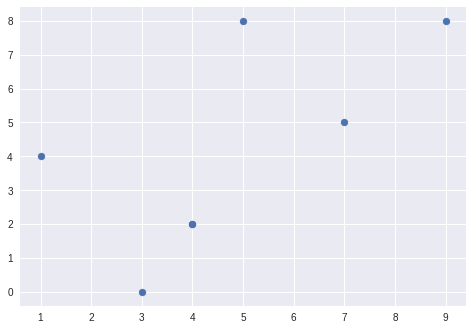

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()